___
# PROJETO 2

## Felipe Viacava de Freitas
___

In [64]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from numpy import mean, var, arange

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\B155 FIRE V3\Documents\Escola\2017.1\CD\CD1S17\Projeto 2


In [65]:
dataframe = pd.read_excel('Life.xlsx')
dataframe.head()

,Life expectancy with projections. Yellow is IHME,A1800,A1801,A1802,A1803,A1804,A1805,A1806,A1807,A1808,...,A2004,A2005,A2006,A2007,A2008,A2009,A2010,A2011,A2012,A2013
0,Afghanistan,28.2110,28.200753,28.190507,28.18026,28.170013,28.159767,28.14952,28.139273,28.129027,...,52.5,52.9,53.2,53.6,54.0,54.5,54.8,55.2,55.5,56.2
1,Albania,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,...,74.4,74.4,74.5,74.7,74.9,75.0,75.2,75.5,75.7,75.8
2,Algeria,28.8224,28.822400,28.822400,28.82240,28.822400,28.822400,28.82240,28.822400,28.822400,...,74.2,74.5,74.8,75.0,75.3,75.6,75.9,76.1,76.2,76.3
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.0,83.1,83.2,83.4,83.5,83.6,83.7,83.8,83.8,83.9


___
## Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida

In [66]:
A1919 = dataframe.A1919[(dataframe.A1945 < 200) & (dataframe.A1945 < 200) & (dataframe.A1990 < 200)]
A1945 = dataframe.A1945[(dataframe.A1945 < 200) & (dataframe.A1945 < 200) & (dataframe.A1990 < 200)]
A1990 = dataframe.A1990[(dataframe.A1945 < 200) & (dataframe.A1945 < 200) & (dataframe.A1990 < 200)]

___
### Análise Descritiva

In [67]:
print(A1919.describe())
print("")
print(A1945.describe())
print("")
print(A1990.describe())

count    201.000000
mean      33.769531
std        8.212032
min       12.000000
25%       29.700000
50%       32.000000
75%       35.179000
max       59.981569
Name: A1919, dtype: float64

count    201.000000
mean      40.799030
std       11.239716
min       15.000000
25%       31.725875
50%       39.110250
75%       47.900000
max       68.460000
Name: A1945, dtype: float64

count    201.000000
mean      66.822104
std        8.305573
min       46.900000
25%       60.500000
50%       69.500000
75%       73.000000
max       79.100000
Name: A1990, dtype: float64


Podemos observar que a média da expectativas de vida teve um grande aumento entre 1919 e 1945 e entre 1945 e 1990. A mediana, por outro lado, só aumentou tão drasticamente entre 1945 e 1990.

In [68]:
faixa = range(12, 83, 5)

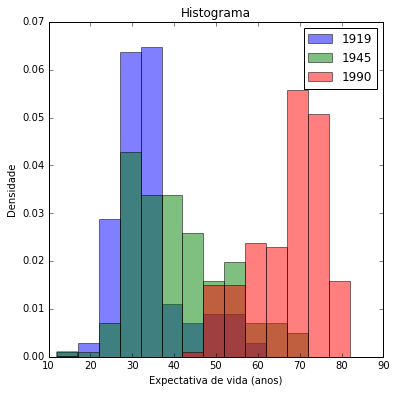

In [69]:
plot = A1919.plot.hist(bins=faixa,title='Histograma', figsize=(6, 6), alpha=0.5, normed=1)
plot = A1945.plot.hist(bins=faixa,title='Histograma', figsize=(6, 6), alpha=0.5, normed=1)
plot = A1990.plot.hist(bins=faixa,title='Histograma', figsize=(6, 6), alpha=0.5, normed=1)
plt.legend(('1919', '1945', '1990'))
plt.ylabel('Densidade')
plt.xlabel('Expectativa de vida (anos)')

Podemos notar as expectativas de vida de 1919 e 1990 são muito concentradas quando comparadas à expectativa de vida de 1945. A distribuição em 1919 aparenta ter assimetria positiva com alta concentração nas classes modais. Em 1945 a distribuição torna-se mais uniforme, mas ainda com assimetria positiva. Já 1990 podemos perceber que há alta concentração de expectativas de vida próximas à média assim como em 1919, mas com assimetria negativa e distribuição ligeiramente mais uniforme.

In [70]:
A1919ord = sorted(A1919)
A1945ord = sorted(A1945)
A1990ord = sorted(A1990)

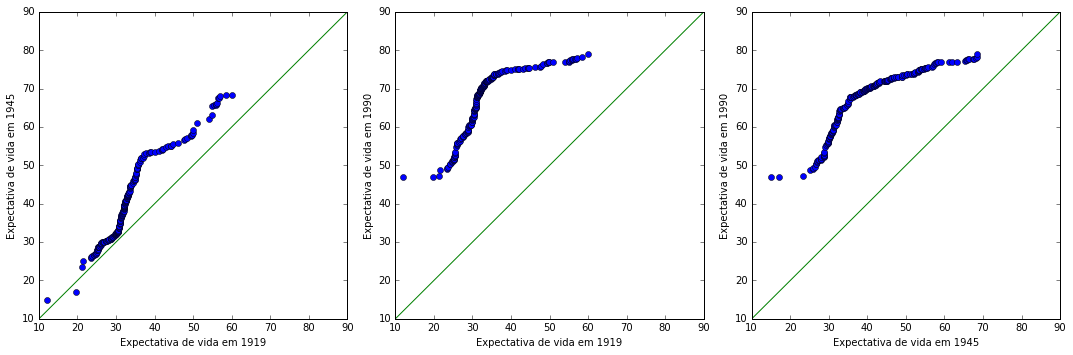

In [71]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(A1919ord, A1945ord, 'o')
plt.plot((10,90),(10,90))
plt.xlabel('Expectativa de vida em 1919')
plt.ylabel('Expectativa de vida em 1945')

plt.subplot(132)
plt.plot(A1919ord, A1990ord, 'o')
plt.plot((10,90),(10,90))
plt.xlabel('Expectativa de vida em 1919')
plt.ylabel('Expectativa de vida em 1990')

plt.subplot(133)
plt.plot(A1945ord, A1990ord, 'o')
plt.plot((10,90),(10,90))
plt.xlabel('Expectativa de vida em 1945')
plt.ylabel('Expectativa de vida em 1990')

plt.tight_layout()
plt.show()

Os QQ-Plots acima nos permitem vizualizar graficamente a diferença entre as expectativas de vida entre os anos 1919, 1945 e 1990. Podemos ver que a expectativa de vida subiu radicalmente ao longo dos anos, tanto que o maior "gap" é entre os anos de 1919 e 1990, seguido por 1945 e 1990 e, só então, 1919 e 1945.

### Aderência de um modelo probabilístico normal aos dados

In [72]:
fae = []

for i in range(len(A1919)):
    j = (i+1-0.5)/(len(A1919))
    fae.append(j)
    

mi1919 = A1919.mean()
sigma1919 = var(A1919) ** 0.5
A1919ord = sorted(A1919)
curva1919 = stats.norm.pdf(A1919ord, loc = mi1919, scale = sigma1919)
curva21919 = stats.norm.cdf(A1919ord, loc = mi1919, scale = sigma1919)
T1919 = stats.norm.ppf(fae, loc = mi1919, scale = sigma1919)

mi1945 = A1945.mean()
sigma1945 = var(A1945) ** 0.5
A1945ord = sorted(A1945)
curva1945 = stats.norm.pdf(A1945ord, loc = mi1945, scale = sigma1945)
curva21945 = stats.norm.cdf(A1945ord, loc = mi1945, scale = sigma1945)
T1945 = stats.norm.ppf(fae, loc = mi1945, scale = sigma1945)

mi1990 = A1990.mean()
sigma1990 = var(A1990) ** 0.5
A1990ord = sorted(A1990)
curva1990 = stats.norm.pdf(A1990ord, loc = mi1990, scale = sigma1990)
curva21990 = stats.norm.cdf(A1990ord, loc = mi1990, scale = sigma1990)
T1990 = stats.norm.ppf(fae, loc = mi1990, scale = sigma1990)

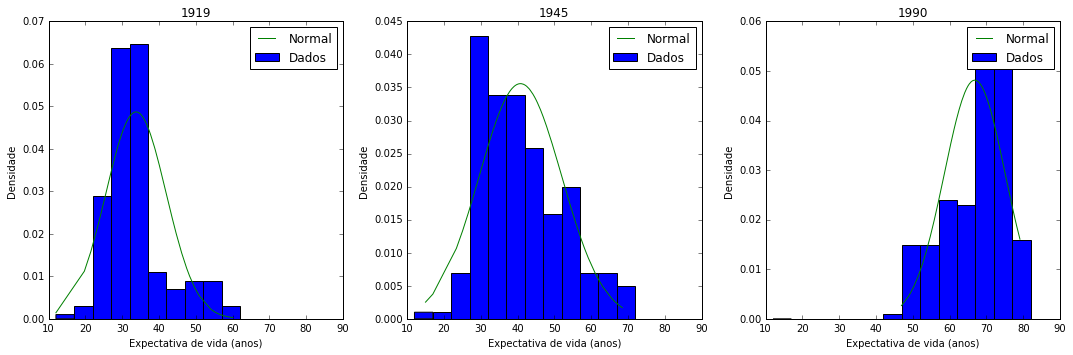

In [73]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(A1919, bins=faixa, alpha=1, normed=1)
plt.plot(A1919ord, curva1919)
plt.title('1919')
plt.legend(('Normal', 'Dados'))
plt.ylabel('Densidade')
plt.xlabel('Expectativa de vida (anos)')

plt.subplot(132)
plt.hist(A1945, bins=faixa, alpha=1, normed=1)
plt.plot(A1945ord, curva1945)
plt.title('1945')
plt.legend(('Normal', 'Dados'))
plt.ylabel('Densidade')
plt.xlabel('Expectativa de vida (anos)')

plt.subplot(133)
plt.hist(A1990, bins=faixa, alpha=1, normed=1)
plt.plot(A1990ord, curva1990)
plt.title('1990')
plt.legend(('Normal', 'Dados'))
plt.ylabel('Densidade')
plt.xlabel('Expectativa de vida (anos)')

plt.tight_layout()
plt.show()

O modelo probabilístico de distribuição normal se encaixa melhor no ano de 1945, onde as densidades do histograma estão mais próximas da curva. Nos outros anos parece não haver uma relação tão grande entre o modelo teórico e os dados reais.

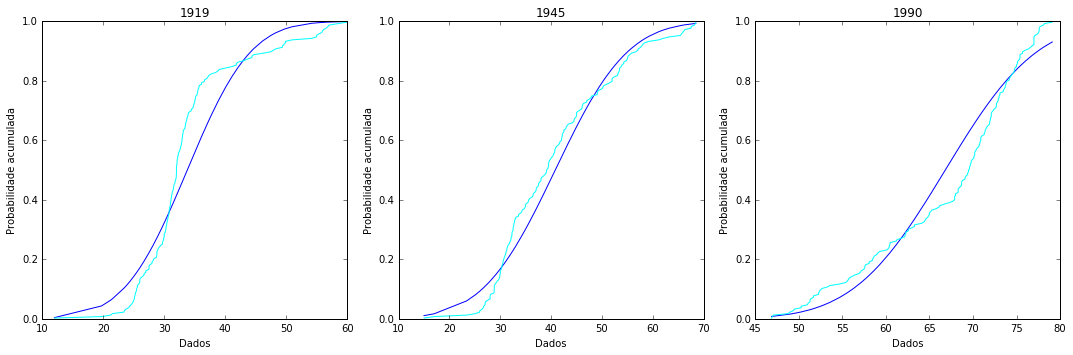

In [74]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(A1919ord, curva21919, color = 'blue')
plt.plot(A1919ord, fae, color = 'cyan')
plt.title('1919')
plt.xlabel('Dados')
plt.ylabel('Probabilidade acumulada')

plt.subplot(132)
plt.plot(A1945ord, curva21945, color = 'blue')
plt.plot(A1945ord, fae, color = 'cyan')
plt.title('1945')
plt.xlabel('Dados')
plt.ylabel('Probabilidade acumulada')

plt.subplot(133)
plt.plot(A1990ord, curva21990, color = 'blue')
plt.plot(A1990ord, fae, color = 'cyan')
plt.title('1990')
plt.xlabel('Dados')
plt.ylabel('Probabilidade acumulada')

plt.tight_layout()
plt.show()

Os valores da probabilidade acumulada teóricos estão mais próximos dos dados no ano de 1945, corroborando a ideia de que o modelo se encaixa melhor neste ano. Podemos ver que as curvas do ano de 1945 tem um formato muito mais parecido do que as demais curvas.

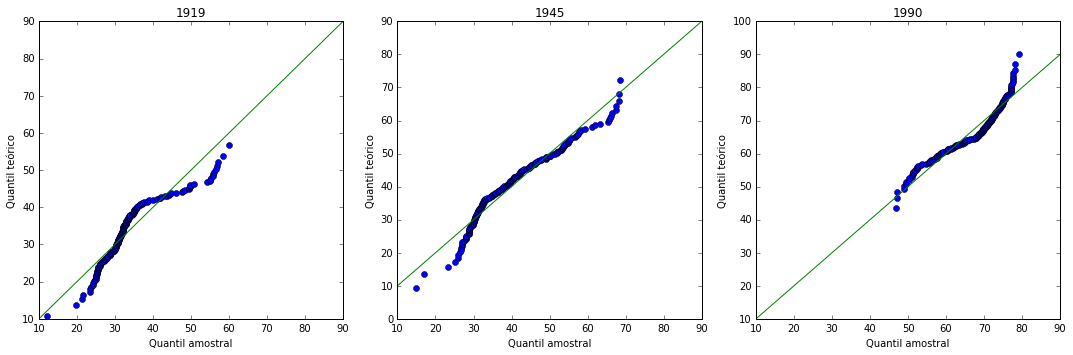

In [75]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(A1919ord, T1919, 'o')
plt.plot((10,90),(10,90))
plt.title('1919')
plt.xlabel('Quantil amostral')
plt.ylabel('Quantil teórico')

plt.subplot(132)
plt.plot(A1945ord, T1945, 'o')
plt.plot((10,90),(10,90))
plt.title('1945')
plt.xlabel('Quantil amostral')
plt.ylabel('Quantil teórico')

plt.subplot(133)
plt.plot(A1990ord, T1990, 'o')
plt.plot((10,90),(10,90))
plt.title('1990')
plt.xlabel('Quantil amostral')
plt.ylabel('Quantil teórico')

plt.tight_layout()
plt.show()

Nestes últimos gráficos, percebe-se que a distribuição teórica parece com a distribuição real no ano de 1945 novamente. Neste caso, no ano de 1990 também parece haver semelhança, mas não como no ano de 1945.

Retomando os demais gráficos plotados nesta seção, conclui-se que para o ano de 1945 há certa semelhança entre o modelo probalístico e os dados reais. Em 1990, embora exista, a semelhança não é grande como em 1945 e, em 1919, não há semelhança alguma.

___
### Aderência de um modelo probabilístico assimétrico aos dados

In [85]:
#assimetria positiva: gama, lognorm, ingnorm
#assimetria negativa: beta

#m, s = stats.norm.fit(ano)

a1919, m1919, s1919 = stats.gamma.fit(A1919)
a1945, m1945, s1945 = stats.gamma.fit(A1945)
a1990, b1990, m1990, s1990 = stats.beta.fit(A1990)

In [86]:
fae = []

for i in range(len(A1919)):
    j = (i+1-0.5)/(len(A1919))
    fae.append(j)
    

mi1919 = A1919.mean()
sigma1919 = var(A1919) ** 0.5
A1919ord = sorted(A1919)
curva1919 = stats.gamma.pdf(A1919ord, a1919, loc = mi1919, scale = sigma1919)
curva21919 = stats.gamma.cdf(A1919ord, a1919, loc = mi1919, scale = sigma1919)
T1919 = stats.gamma.ppf(fae, a1919, loc = mi1919, scale = sigma1919)

mi1945 = A1945.mean()
sigma1945 = var(A1945) ** 0.5
A1945ord = sorted(A1945)
curva1945 = stats.gamma.pdf(A1945ord, a1945, loc = mi1945, scale = sigma1945)
curva21945 = stats.gamma.cdf(A1945ord, a1945, loc = mi1945, scale = sigma1945)
T1945 = stats.gamma.ppf(fae, a1945, loc = mi1945, scale = sigma1945)

mi1990 = A1990.mean()
sigma1990 = var(A1990) ** 0.5
A1990ord = sorted(A1990)
curva1990 = stats.beta.pdf(A1990ord, a1990, b1990, loc = mi1990, scale = sigma1990)
curva21990 = stats.beta.cdf(A1990ord, a1990, b1990, loc = mi1990, scale = sigma1990)
T1990 = stats.beta.ppf(fae, a1990, b1990, loc = mi1990, scale = sigma1990)

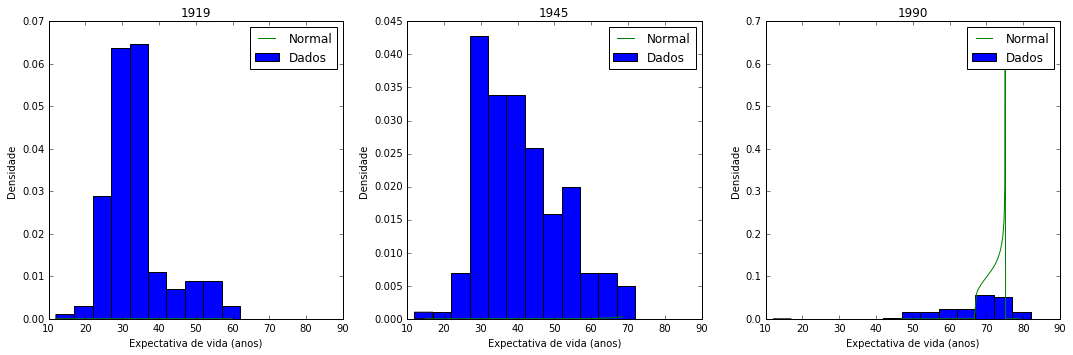

In [87]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(A1919, bins=faixa, alpha=1, normed=1)
plt.plot(A1919ord, curva1919)
plt.title('1919')
plt.legend(('Normal', 'Dados'))
plt.ylabel('Densidade')
plt.xlabel('Expectativa de vida (anos)')

plt.subplot(132)
plt.hist(A1945, bins=faixa, alpha=1, normed=1)
plt.plot(A1945ord, curva1945)
plt.title('1945')
plt.legend(('Normal', 'Dados'))
plt.ylabel('Densidade')
plt.xlabel('Expectativa de vida (anos)')

plt.subplot(133)
plt.hist(A1990, bins=faixa, alpha=1, normed=1)
plt.plot(A1990ord, curva1990)
plt.title('1990')
plt.legend(('Normal', 'Dados'))
plt.ylabel('Densidade')
plt.xlabel('Expectativa de vida (anos)')

plt.tight_layout()
plt.show()

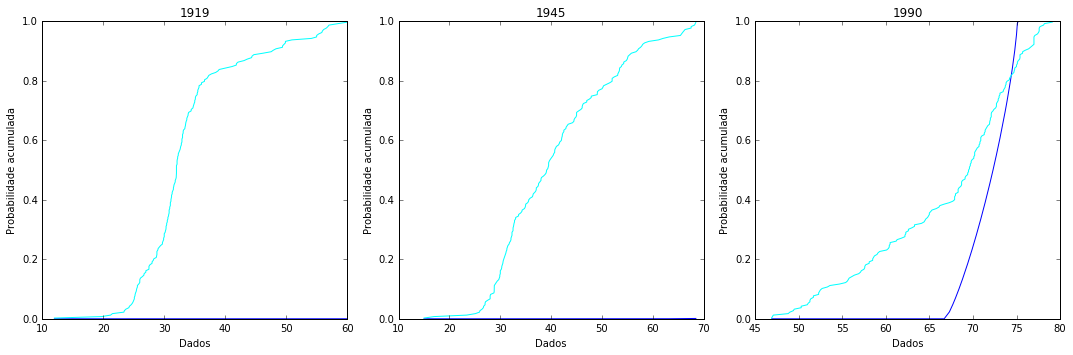

In [79]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(A1919ord, curva21919, color = 'blue')
plt.plot(A1919ord, fae, color = 'cyan')
plt.title('1919')
plt.xlabel('Dados')
plt.ylabel('Probabilidade acumulada')

plt.subplot(132)
plt.plot(A1945ord, curva21945, color = 'blue')
plt.plot(A1945ord, fae, color = 'cyan')
plt.title('1945')
plt.xlabel('Dados')
plt.ylabel('Probabilidade acumulada')

plt.subplot(133)
plt.plot(A1990ord, curva21990, color = 'blue')
plt.plot(A1990ord, fae, color = 'cyan')
plt.title('1990')
plt.xlabel('Dados')
plt.ylabel('Probabilidade acumulada')

plt.tight_layout()
plt.show()

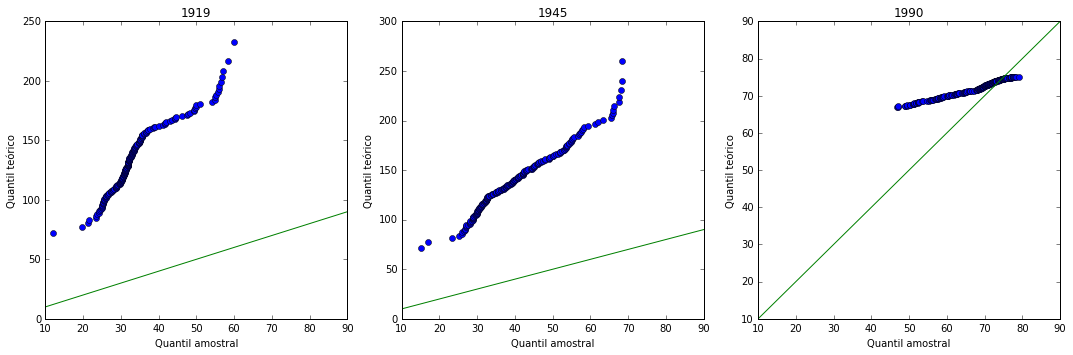

In [80]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(A1919ord, T1919, 'o')
plt.plot((10,90),(10,90))
plt.title('1919')
plt.xlabel('Quantil amostral')
plt.ylabel('Quantil teórico')

plt.subplot(132)
plt.plot(A1945ord, T1945, 'o')
plt.plot((10,90),(10,90))
plt.title('1945')
plt.xlabel('Quantil amostral')
plt.ylabel('Quantil teórico')

plt.subplot(133)
plt.plot(A1990ord, T1990, 'o')
plt.plot((10,90),(10,90))
plt.title('1990')
plt.xlabel('Quantil amostral')
plt.ylabel('Quantil teórico')

plt.tight_layout()
plt.show()

___
### Cálculo de probabilidades a partir da distribuição normal